In [1]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

2025-02-14 11:52:40.605917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739523160.624999    4675 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739523160.631236    4675 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 11:52:40.653484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Örnek 1: Bir RNN katmanı

In [2]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

I0000 00:00:1739523165.894081    4675 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6717 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1739523165.900615    4675 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6717 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Örnek 2: Boyutlandırılmış RNN katmanı

In [3]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Örnek 3: Ardışık RNN katmanları

In [4]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# IMDB VERİ KÜMESİNİ HAZIRLAMAK

**IMDB: Internet Movie Database (Internet Film Veritabanı)**

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [6]:
num_features = 1000
maxlen = 500
batch_size = 32

In [7]:
print('load data')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_features)

print(len(input_train), "Eğitim Dizisi " , input_train.shape)
print(len(input_test), "Test Dizisi", input_test.shape)

load data
25000 Eğitim Dizisi  (25000,)
25000 Test Dizisi (25000,)


In [8]:
print('Pad sequence (sample x train)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(len(input_train), "Eğitim Dizisi " , input_train.shape)
print(len(input_test), "Test Dizisi", input_test.shape)

Pad sequence (sample x train)
25000 Eğitim Dizisi  (25000, 500)
25000 Test Dizisi (25000, 500)


## Embedding ve SimpleRNN Katmanlarının Eğitilmesi

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

## Basit RNN ile Modelleme

In [10]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='rmsprop',
             loss="binary_crossentropy", metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10


I0000 00:00:1739523171.938143    4739 service.cc:148] XLA service 0x7f280c004060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739523171.938204    4739 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
I0000 00:00:1739523171.938210    4739 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-02-14 11:52:51.992588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739523172.212464    4739 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1739523175.401505    4739 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - acc: 0.5648 - loss: 0.6747 - val_acc: 0.7212 - val_loss: 0.5607
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - acc: 0.7622 - loss: 0.5153 - val_acc: 0.8048 - val_loss: 0.4440
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - acc: 0.7909 - loss: 0.4614 - val_acc: 0.8072 - val_loss: 0.4455
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - acc: 0.8121 - loss: 0.4287 - val_acc: 0.8252 - val_loss: 0.4106
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - acc: 0.8221 - loss: 0.4030 - val_acc: 0.7654 - val_loss: 0.4782
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - acc: 0.8400 - loss: 0.3684 - val_acc: 0.8452 - val_loss: 0.3742
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.8592 - loss: 0.3382 - val_acc: 0.7478 - val_loss: 0.4928
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - acc: 0.8434 - loss: 0.3604 - val_acc: 0.8196 - val_loss: 0.4353
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/s

In [12]:
import matplotlib.pyplot as plt

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epochs = range(1, len(acc)+1)

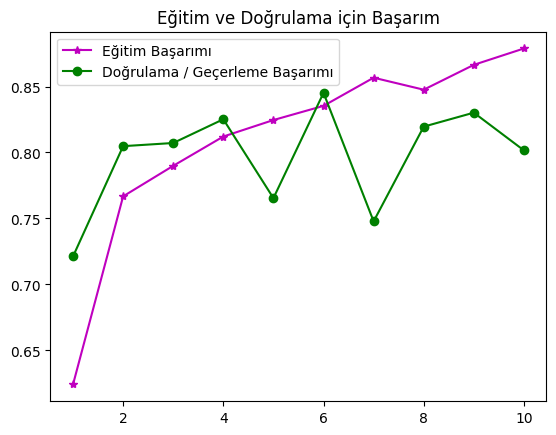

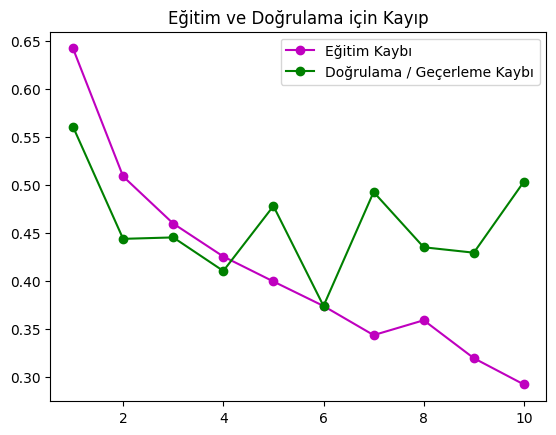

In [15]:
plt.plot(epochs, acc, 'm*-', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'go-', label='Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'mo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'go-', label='Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt.legend()

plt.show()

## Basit bir LSTM ile Modelleme

In [16]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Modelin derlenmesi LSTM

In [17]:
model.compile(optimizer='rmsprop',
             loss="binary_crossentropy", metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 170ms/step - acc: 0.5443 - loss: 0.6838 - val_acc: 0.5930 - val_loss: 0.6705
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - acc: 0.7325 - loss: 0.5415 - val_acc: 0.8126 - val_loss: 0.4300
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - acc: 0.7937 - loss: 0.4555 - val_acc: 0.8172 - val_loss: 0.4215
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - acc: 0.8184 - loss: 0.4218 - val_acc: 0.8228 - val_loss: 0.3983
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - acc: 0.8233 - loss: 0.4086 - val_acc: 0.8080 - val_loss: 0.4326
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - acc: 0.8264 - loss: 0.3951 - val_acc: 0.8452 - val_loss: 0.3904
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - acc: 0.8377 - loss: 0.3730 - val_acc: 0.8492 - val_loss: 0.3508
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - acc: 0.8464 - loss: 0.3489 - val_acc: 0.8436 - val_loss: 0.3798
Epoch 9/10
157/157 ━━━━━━━━━━━━━

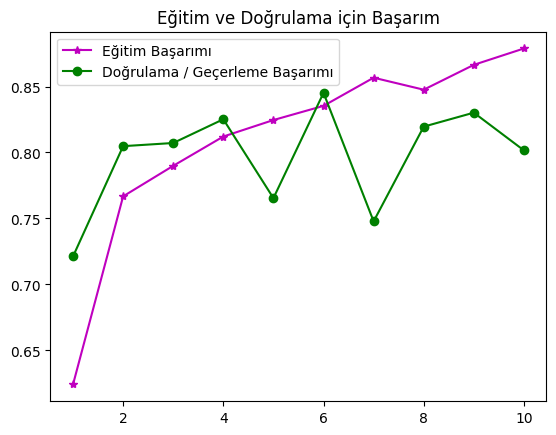

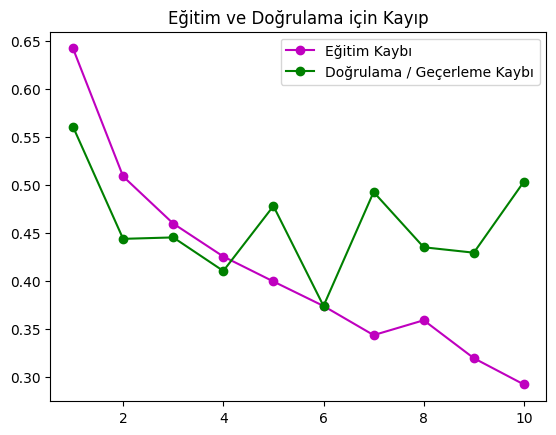

In [18]:
plt.plot(epochs, acc, 'm*-', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'go-', label='Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'mo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'go-', label='Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt.legend()

plt.show()